[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Measures%20of%20Association/Python/Linear%20Regression.ipynb)

Below are answers to the exercises described [here](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Measures%20of%20Association/Linear%20Regression.ipynb)

# Getting started with code

Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Measures of Association/ParametricCorrelation.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add

# Exercises

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	| Wing Length
-- | --
3	| 1.4
4	| 1.5
5	| 2.2
6	| 2.4
7	| 3.1
8	| 3.2
9	| 3.2
11	| 3.9
12	| 4.1
14	| 4.7
15	| 4.5
16	| 5.2
17 | 5.0


##### 1\. Plot the relationship between Age and Wing Length.

Text(0, 0.5, 'Wing Length (cm)')

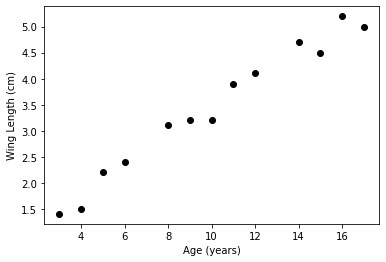

In [2]:
# Always run this cell to load the data
# The data: wing lengths of 13 birds at different ages
age=[3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17] # the X variable
wing_length=[1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5] # the Y variable

# Plot the data
plt.plot(age, wing_length, 'ko')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')

##### 2\. Calculate and plot the regression line.

slope = 0.27 computed, 0.27 built-in
intercept = 0.71 computed, 0.71 built in


Text(0.5, 1.0, '$WingLength_{pred}$ = 0.71 + 0.27 Age')

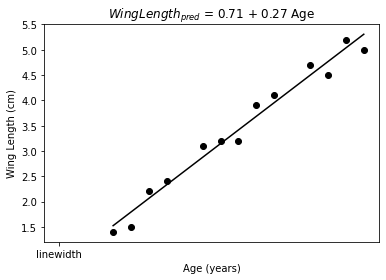

In [3]:
# Computing regession line predicted_wing_length = a + b * age.
n=len(age) # alternatively, you can calculate n=len(wing_length)
SumX=np.sum(age) # sum up all X values
MeanX=np.mean(age) # find the mean X value
SumX2=np.sum(np.square(age))  # the sum of each X squared
Sumx2=SumX2-np.square(SumX)/n  # the sum of the square of the difference between (each X and mean X);

SumY=np.sum(wing_length) #sum up all Y values
MeanY=np.mean(wing_length) # find the mean Y value
SumXY=np.inner(age, wing_length) # the sum of the product of each X and Y values
Sumxy=SumXY-SumX*SumY/n # the sum of the product of the difference between each X value minus the
SumY2=np.sum(np.square(wing_length)) # the sum of each Y squared

# SLOPE
b=Sumxy/Sumx2

# INTERCEPT
a=MeanY-b*MeanX

# Check against built-in function
coefs = np.polyfit(age, wing_length, 1)
print(f'slope = {b:.2f} computed, {coefs[0]:.2f} built-in')
print(f'intercept = {a:.2f} computed, {coefs[1]:.2f} built in')

# Add the regression line to the plot
plt.plot(age, wing_length, 'ko')
xax = [age[0], age[-1]]
plt.plot(xax, [b*x for x in xax]+a,'k-','linewidth',2)
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.title(f'$WingLength_{{pred}}$ = {a:.2f} + {b:.2f} Age')


##### 3\. Can you reject $H_0:b=0$?

In [4]:
# Using an F-test
k = 2 # number of groups
ndf = k-1 # numerator degrees of freedom
ddf= n-k #  denominator degrees of freedom
totalSS=SumY2-SumY**2/n # totalSS is essentially the sum of the square of the difference between (each y and mean Y);
regressionSS=Sumxy**2/Sumx2
residualSS=totalSS-regressionSS
Fstat=regressionSS/(residualSS/ddf)
prob=1-st.f.cdf(Fstat,ndf,ddf) # significance probability for regression
print(f'p(Fstat) of H_0:b=0 = {prob:E}')

# Using a t-test
#syx=np.sqrt((residualSS/ddf));
sb=np.sqrt(residualSS/ddf/Sumx2) # sb is essentially the standard error of the regression slope
Tval=(b-0)/sb;
prob = 1-st.t.cdf(Tval,ddf) # degrees of freedom is n-k
print(f'p(Tstat) of H_0:b=0 = {prob:}')

p(Fstat) of H_0:b=0 = 5.267053E-10
p(Tstat) of H_0:b=0 = 2.633526730022595e-10


##### 4\. Calculate and plot the confidence intervals on the slope of the regression.

Text(4, 4.2, '95% CI in red dashed lines')

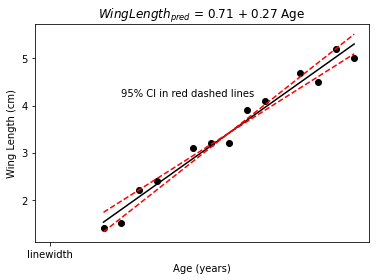

In [5]:
alpha = 0.05;
t=-1*st.t.ppf(alpha/2,ddf) # ddf is the degrees of freedom
b05=b-t*sb # lower CI
b95=b+t*sb # upper CI
a05=MeanY-b05*MeanX # intercept for lower CI
a95=MeanY-b95*MeanX # intercept for upper CI

# Add the regression line to the plot
plt.plot(age, wing_length, 'ko')
plt.plot(xax, [b*x for x in xax]+a,'k-','linewidth',2)
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.title(f'$WingLength_{{pred}}$ = {a:.2f} + {b:.2f} Age')
plt.plot(xax,[b05*x for x in xax]+a05, 'r--', 'linewidth', 2)
plt.plot(xax,[b95*x for x in xax]+a95, 'r--', 'linewidth', 2)
plt.text(4,4.2,'95% CI in red dashed lines')




##### 4\. Calculate $r^2$ (the coefficient of determination)

In [6]:
# Calculate r2 (coefficient of determination)
totalSS=SumY2-SumY**2/n    # totalSS is essentially the sum of the square of the difference between (each y and mean Y);
regressionSS=Sumxy**2/Sumx2
r2=regressionSS/totalSS
print(f'r^2={r2:.4f}')

r^2=0.9733


##### 6\. Calculate Pearson's *r*.

In [7]:
r=np.corrcoef(age, wing_length)
print(f'r={r[0,1]:.4f}')

r=0.9866


##### 7\. Add some noise to the data and see how the regression changes.

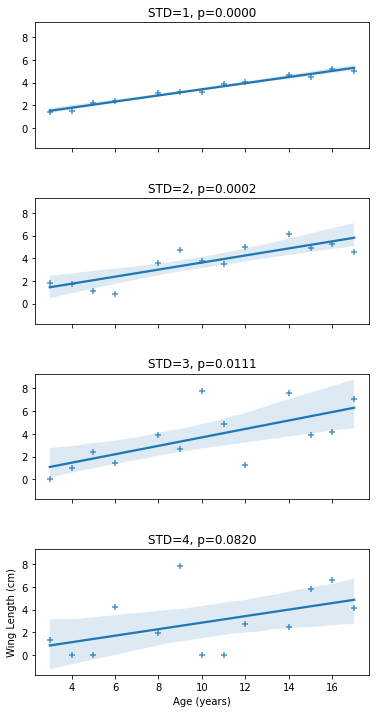

In [8]:
# Loop through noise levels
NUM_STD = 4

# Set up figure with subplots
fig, axs = plt.subplots(NUM_STD, 1, figsize=(6, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4)

for nn in np.arange(NUM_STD):
    
    # add Gaussian noise to the observations
    new_lengths = np.maximum(0, list(map(add, wing_length, np.random.normal(0,nn,len(wing_length)))))
    
    # Get stats using scipy
    slope, intercept, r, p, sem = st.linregress(age, new_lengths)
    
    # Plot using Seaborn
    plt.axes(axs[nn])
    sns.regplot(x=age, y=new_lengths, marker='+')
    plt.title(f'STD={nn+1:d}, p={p:.4f}')

plt.xlabel('Age (years)');
plt.ylabel('Wing Length (cm)');
    

# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- Fun applets are [here](https://www.desmos.com/calculator/jwquvmikhr) and [here](http://www.shodor.org/interactivate/activities/Regression/).

- Working with linear regression in [Matlab](https://www.mathworks.com/help/matlab/data_analysis/linear-regression.html), [R](https://www.tutorialspoint.com/r/r_linear_regression.htm), and [Python](https://realpython.com/linear-regression-in-python/).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania